In [211]:
#타이타닉 데이터 다운로드
#탐색적 데이터분석, 데이터전처리, 특성공학, 모델 선택, 튜닝

In [212]:
#캐글 데이터 분석 절차
# 1. 데이터 확인
# 2. 시각화(타깃 변수, 수치 데이터, 범주 데이터 확인)
# 3. 데이터 정제 (null, outliers 처리)
# 4. 시각화
# 5. 특성공학(feature engineering), 원핫인코딩
# 6. 모델 생성, 평가(퍼러미터 수정)
# 7. 결과 제출

In [213]:
import numpy as np
import pandas as pd

In [214]:
# 1. 데이터 확인
train=pd.read_csv('f:/data/titanic/train.csv', index_col='PassengerId')
test=pd.read_csv('f:/data/titanic/test.csv', index_col='PassengerId')

In [215]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [216]:
train.head()
train.tail()
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non

In [217]:
train.dtypes.unique()
test.dtypes.unique()


array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [218]:
#train.describe()
train.select_dtypes(include=['object']).describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [219]:
train.describe()
train.drop('Survived', axis=1).describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [220]:
target=train.Survived.copy()
target

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [221]:
#target열에 na가 있는지 확인

In [222]:
target.isna().sum()
target.isna().value_counts()
target.isna().any()

False

In [223]:
target
#생존율?
target.sum()/len(target) * 100
target.sum() / target.count()
target.loc[target==1].size/target.size

0.3838383838383838

In [224]:
train.drop('Survived', axis=1).columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [225]:
test.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [226]:
train.drop('Survived', axis=1).columns.equals(test.columns)

True

In [227]:
# 2. 시각화(타깃 변수, 수치 데이터, 범주 데이터 확인)

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Survived', ylabel='count'>

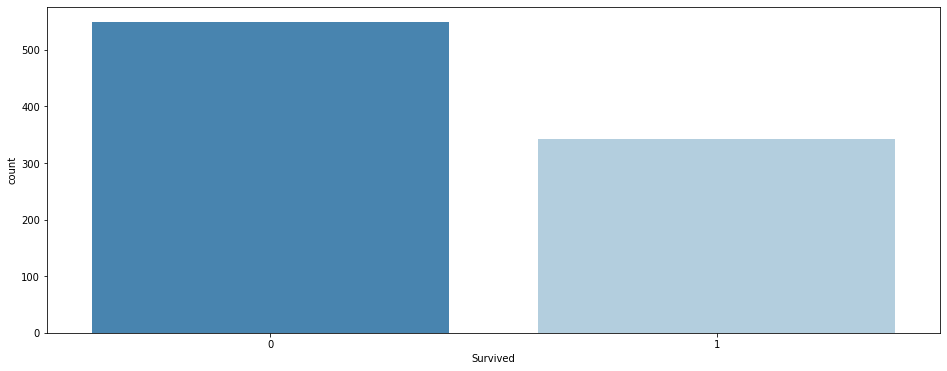

In [229]:
plt.figure(figsize=(16,6))
sns.countplot(x=train.Survived, palette='Blues_r')

In [230]:
##오류 수정
def plot_grid(data, fig_size, grid_size, plot_type, target=''): # target=''
    fig=plt.figure(figsize=fig_size)    
    if plot_type=='histplot':
        for i, column_name in enumerate(data.select_dtypes(exclude='object').columns):
            fig.add_subplot(grid_size[0], grid_size[1], i+1)
            sns.histplot(data[column_name], kde=True, color='royalblue')
    if plot_type=='boxplot':
        for i, column_name in enumerate(data.select_dtypes(exclude='object').columns):
            fig.add_subplot(grid_size[0], grid_size[1], i+1)
            sns.boxplot(data[column_name], color='royalblue')            
    if plot_type=='countplot':
        target=data[target]
        for i, column_name in enumerate(data.drop(target.name, axis=1).columns):
            fig.add_subplot(grid_size[0], grid_size[1], i+1)
            sns.countplot(data[column_name],hue=target)             

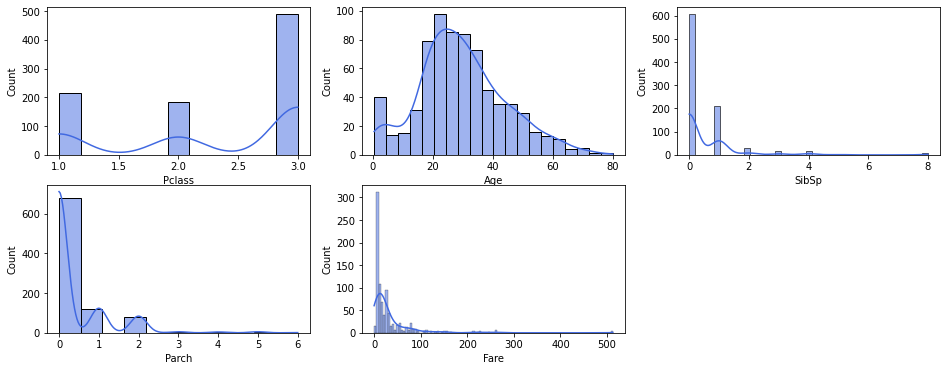

In [231]:
#타깃열 제외, fig 크기 = (16,6), 창 분할=(2행,3열), 기본그래프=히스토그램
plot_grid(train.drop('Survived', axis=1), (16,6), (2,3), 'histplot')

In [232]:

#            Age     Fare       Parch       Pclass     Sibsp
# Survived
# 0
# 1
train.pivot_table(index=['Survived'])
pd.pivot_table(train, index = 'Survived', values = ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass'], aggfunc = 'mean')

,Age,Fare,Parch,Pclass,SibSp
Survived,,,,,
0,30.626179,22.117887,0.329690,2.531876,0.553734
1,28.343690,48.395408,0.464912,1.950292,0.473684


C:\Users\poeun\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\poeun\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\poeun\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWar

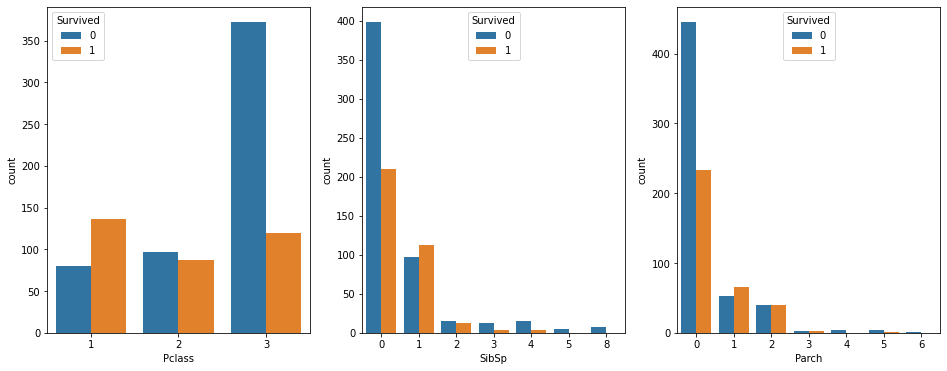

In [233]:
plot_grid(train.select_dtypes(exclude='object').drop(['Fare','Age'],axis=1),(16,6),(1,3),'countplot', 'Survived')

In [234]:
pd.pivot_table(train, index='Survived', values=['SibSp', 'Parch', 'Pclass'],aggfunc=(lambda x:x.mode()[0]))

,Parch,Pclass,SibSp
Survived,,,
0,0,3,0
1,0,1,0


In [235]:
# Pclass     1     2     3
# Survived
# 0         80   97   372
# 1               ...

pd.pivot_table(train, index='Survived', columns='Pclass', values='Name', 
               aggfunc='count')
pd.pivot_table(train, index='Survived', columns='Parch', values='Name', 
               aggfunc='count')


Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445.0,53.0,40.0,2.0,4.0,4.0,1.0
1,233.0,65.0,40.0,3.0,NaN,1.0,NaN


In [236]:
pd.pivot_table(train, index = 'Survived', columns = 'Pclass', values = ['Age','Fare','Parch','SibSp'], aggfunc='count')


Age          Fare          Parch          SibSp         
Pclass      1   2    3    1   2    3     1   2    3     1   2    3
Survived                                                          
0          64  90  270   80  97  372    80  97  372    80  97  372
1         122  83   85  136  87  119   136  87  119   136  87  119

In [237]:
train.pivot_table(values='Parch', index='Survived', columns='Pclass', aggfunc='count')


Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


<AxesSubplot:>

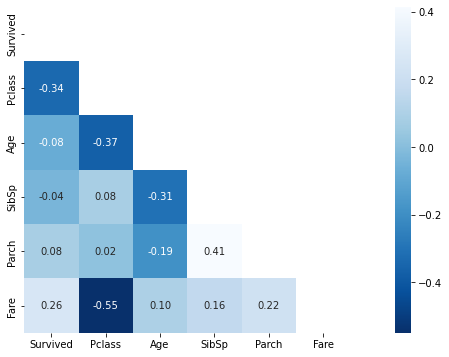

In [238]:
plt.figure(figsize=(16,6))
sns.heatmap(train.corr(),
           annot=True,
           mask=np.triu(train.corr()),
           cmap='Blues_r',
           fmt='.2f',
           square=True)

# 분석 결과

In [239]:
# 생존자 특성
# 어리다
# 1등석 또는 2등석
# 티켓값 비싸다
# 여러명 가족이 탔다
# parch 경우에는 별 상관이 없다

In [240]:
#범주형 데이터 시각화

C:\Users\poeun\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\poeun\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


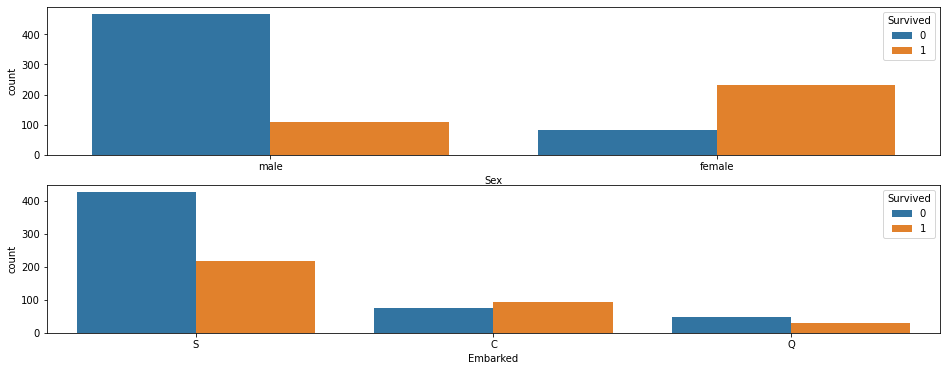

In [241]:
plot_grid(pd.concat([train.select_dtypes(include='object').
           drop(['Name','Ticket','Cabin'],axis=1), 
                     target],axis=1),
          (16,6),
          (2,1),
          'countplot',
          'Survived')

In [242]:
#Embarked가 C인 도시에서 탑승한 승객은 어떤 특성이 있길래?
#생존자 > 사망자 더 큰걸까?

#선실 등급(요금)이 더 높을까?
#다른 도시와 비교했을때 여성(아이)이 많을까?
#나이가 어떤 차이가 있을까?
train.groupby("Embarked")["Age"].mean()
pd.pivot_table(train, index="Embarked", columns='Pclass' , 
               values="Fare", aggfunc="count")
pd.pivot_table(train, index="Embarked", columns='Sex' ,
               values="Fare", aggfunc="count")
pd.pivot_table(train, index="Embarked", columns='Pclass' ,
               values="Fare", aggfunc="mean")


Pclass,1,2,3
Embarked,,,
C,104.718529,25.358335,11.214083
Q,90.000000,12.350000,11.183393
S,70.364862,20.327439,14.644083


In [243]:
train.pivot_table(index = 'Embarked',
                  values = ['Pclass','Age','Fare'])


,Age,Fare,Pclass
Embarked,,,
C,30.814769,59.954144,1.886905
Q,28.089286,13.276030,2.909091
S,29.445397,27.079812,2.350932


In [244]:
train[train["Age"]<= 16]["Embarked"].value_counts()
# S가 아동이 더 많다.


S    74
C    19
Q     7
Name: Embarked, dtype: int64

In [245]:
train.select_dtypes(include='object').nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [246]:
# 3. 데이터 정제 (null, outliers 처리)

In [247]:
train_test=pd.concat([train.drop('Survived', axis=1),test],
                     keys=['train','test'], axis=0)

In [248]:
train_test #1309 rows × 10 columns

Pclass                                               Name  \
      PassengerId                                                              
train 1                 3                            Braund, Mr. Owen Harris   
      2                 1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
      3                 3                             Heikkinen, Miss. Laina   
      4                 1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
      5                 3                           Allen, Mr. William Henry   
...                   ...                                                ...   
test  1305              3                                 Spector, Mr. Woolf   
      1306              1                       Oliva y Ocana, Dona. Fermina   
      1307              3                       Saether, Mr. Simon Sivertsen   
      1308              3                                Ware, Mr. Frederick   
      1309              3                           Peter, Master. Michael J   

                      Sex   Age  SibSp  Parch              Ticket      Fare  \
      PassengerId                                                             
train 1              male  22.0      1      0           A/5 21171    7.2500   
      2            female  38.0      1      0            PC 17599   71.2833   
      3            female  26.0      0      0    STON/O2. 3101282    7.9250   
      4            female  35.0      1      0              113803   53.1000   
      5              male  35.0      0      0              373450    8.0500   
...                   ...   ...    ...    ...                 ...       ...   
test  1305           male   NaN      0      0           A.5. 3236    8.0500   
      1306         female  39.0      0      0            PC 17758  108.9000   
      1307           male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   
      1308           male   NaN      0      0              359309    8.0500   
      1309           male   NaN      1      1                2668   22.3583   

                  Cabin Embarked  
      PassengerId                 
train 1             NaN        S  
      2             C85        C  
      3             NaN        S  
      4            C123        S  
      5             NaN        S  
...                 ...      ...  
test  1305          NaN        S  
      1306         C105        C  
      1307          NaN        S  
      1308          NaN        S  
      1309          NaN        C  

[1309 rows x 10 columns]

In [249]:
pd.concat([train_test.isna().sum(),
(train_test.isna().sum()/train_test.shape[0])*100],axis=0)

Pclass         0.000000
Name           0.000000
Sex            0.000000
Age          263.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           1.000000
Cabin       1014.000000
Embarked       2.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age           20.091673
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.076394
Cabin         77.463713
Embarked       0.152788
dtype: float64

In [250]:
train_cleaning=train.drop('Survived', axis=1).copy()
test_cleaning=test.copy()

In [251]:
train_cleaning['Cabin'].fillna('None', inplace=True)
test_cleaning['Cabin'].fillna('None', inplace=True)

In [252]:
train_cleaning['Age'].fillna(train_cleaning['Age'].median(), inplace=True)

In [253]:
test_cleaning['Age'].fillna(test_cleaning['Age'].median(), inplace=True)

In [254]:
test_cleaning['Fare'].fillna(0, inplace=True)

In [255]:
train_cleaning['Embarked'].isnull().sum()

2

In [256]:
train_cleaning['Embarked'].fillna(train_cleaning[(train_cleaning.Fare<85)&
                                                 (train_cleaning.Fare>75)&
 (train_cleaning.Cabin.str.contains('B'))].Embarked.mode()[0],inplace=True)

In [257]:
train_cleaning.isnull().sum().max()
test_cleaning.isnull().sum().max()

0

In [258]:
X_y=pd.concat([train_cleaning, target], axis=1)

In [259]:
X_y.drop(X_y.loc[X_y.Age==80].index, axis=0,inplace=True)

In [260]:
X_y.Age.describe()

count    890.000000
mean      29.304685
std       12.915708
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       74.000000
Name: Age, dtype: float64

In [261]:
train_cleaning=X_y.drop('Survived', axis=1).copy()

In [262]:
target_cleaned=X_y.Survived.copy()

In [263]:
target_cleaned.shape[0]

890

In [264]:
# outliers > q3 + (q3-q1)*1.5
# outliers < q1 - (q3-q1)*1.5

In [265]:
# Cabin 변수값에 따른 Pclass별 생존자수
# Age열 값에 따라 생존자수
# ...

<AxesSubplot:xlabel='Age', ylabel='Count'>

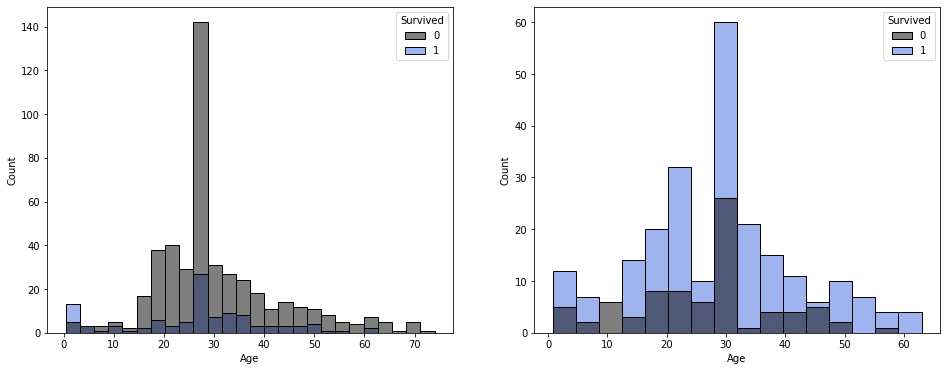

In [266]:
fig,  axes =plt.subplots(1,2,  figsize=(16,6)) #male, female 생존자 히스토그램
sns.histplot(x=train_cleaning.Age.loc[train_cleaning.Sex=='male'],
            ax=axes[0], hue=target_cleaned, palette={0:'black', 1:'royalblue'})
sns.histplot(x=train_cleaning.Age.loc[train_cleaning.Sex=='female'],
            ax=axes[1], hue=target_cleaned, palette={0:'black', 1:'royalblue'})

<AxesSubplot:xlabel='Age', ylabel='Density'>

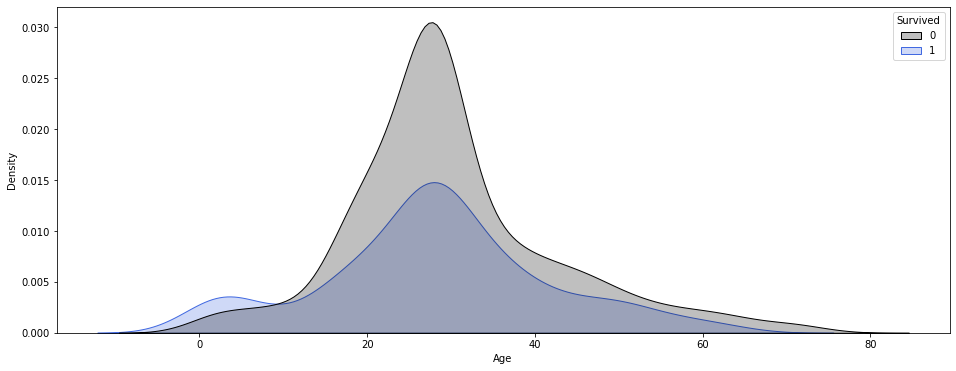

In [267]:
plt.figure(figsize=(16,6))
sns.kdeplot(x=train_cleaning.Age,
           hue=target_cleaned, palette={0:'black', 1:'royalblue'}, fill=True)

In [268]:
# 5. 특성공학(feature engineering), 원핫인코딩

In [269]:
train_cleaning
test_cleaning
train_test_cleaning=pd.concat([train_cleaning, test_cleaning],axis=0, keys=['train','test'])
train_test_cleaning

Pclass                                               Name  \
      PassengerId                                                              
train 1                 3                            Braund, Mr. Owen Harris   
      2                 1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
      3                 3                             Heikkinen, Miss. Laina   
      4                 1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
      5                 3                           Allen, Mr. William Henry   
...                   ...                                                ...   
test  1305              3                                 Spector, Mr. Woolf   
      1306              1                       Oliva y Ocana, Dona. Fermina   
      1307              3                       Saether, Mr. Simon Sivertsen   
      1308              3                                Ware, Mr. Frederick   
      1309              3                           Peter, Master. Michael J   

                      Sex   Age  SibSp  Parch              Ticket      Fare  \
      PassengerId                                                             
train 1              male  22.0      1      0           A/5 21171    7.2500   
      2            female  38.0      1      0            PC 17599   71.2833   
      3            female  26.0      0      0    STON/O2. 3101282    7.9250   
      4            female  35.0      1      0              113803   53.1000   
      5              male  35.0      0      0              373450    8.0500   
...                   ...   ...    ...    ...                 ...       ...   
test  1305           male  27.0      0      0           A.5. 3236    8.0500   
      1306         female  39.0      0      0            PC 17758  108.9000   
      1307           male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   
      1308           male  27.0      0      0              359309    8.0500   
      1309           male  27.0      1      1                2668   22.3583   

                  Cabin Embarked  
      PassengerId                 
train 1            None        S  
      2             C85        C  
      3            None        S  
      4            C123        S  
      5            None        S  
...                 ...      ...  
test  1305         None        S  
      1306         C105        C  
      1307         None        S  
      1308         None        S  
      1309         None        C  

[1308 rows x 10 columns]

In [270]:
train_test_cleaning['CabinLetter']=train_test_cleaning.Cabin.str.split().apply(
    lambda x : x[-1][0].strip().lower() if x[0] !='None' else np.nan)

In [271]:
train_test_cleaning['CabinLetter']

       PassengerId
train  1              NaN
       2                c
       3              NaN
       4                c
       5              NaN
                     ... 
test   1305           NaN
       1306             c
       1307           NaN
       1308           NaN
       1309           NaN
Name: CabinLetter, Length: 1308, dtype: object

In [272]:
#멀티 색인에서 특정 색인 추출
train_test_cleaning.xs('train').groupby('Pclass').CabinLetter.apply(
lambda x : x.value_counts())

train_test_cleaning.xs('train').groupby('Pclass').CabinLetter.apply(
lambda x : x.value_counts().index[0])

Pclass
1    c
2    f
3    g
Name: CabinLetter, dtype: object

In [273]:
train_cleaning_new=train_test_cleaning.xs('train').copy()
test_cleaning_new=train_test_cleaning.xs('test').copy()

In [274]:
train_cleaning_new['CabinLetter']=train_cleaning_new.groupby('Pclass')['CabinLetter'].apply(lambda x: x.fillna(x.mode()[0]))

In [275]:
train_cleaning_new

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinLetter
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S,g
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,c
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S,g
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,c
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S,g
...,...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,None,S,f
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,b
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,None,S,g


In [276]:
# 트레인데이터 캐빈열 값에 대해  pclass별로 가장 빈번한 캐빈열 문자를 추출하고,
# 테스트데이터 캐빈열 na 값을 추출한  트레인데이터 캐빈열 값으로 대체

for i in train.Pclass.unique():
    test_cleaning_new.loc[test_cleaning_new.Pclass==i, 'CabinLetter']= \
    test_cleaning_new.loc[test_cleaning_new.Pclass==i, 'CabinLetter'] \
    .fillna(train_cleaning_new.loc[train_cleaning_new.Pclass==i] \
            .CabinLetter.mode()[0])    

In [277]:
train_cleaning_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 1 to 891
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       890 non-null    int64  
 1   Name         890 non-null    object 
 2   Sex          890 non-null    object 
 3   Age          890 non-null    float64
 4   SibSp        890 non-null    int64  
 5   Parch        890 non-null    int64  
 6   Ticket       890 non-null    object 
 7   Fare         890 non-null    float64
 8   Cabin        890 non-null    object 
 9   Embarked     890 non-null    object 
 10  CabinLetter  890 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 83.4+ KB


In [278]:
train_test_cleaning=pd.concat([train_cleaning_new, test_cleaning_new],
                              keys=['train','test'], axis=0)

In [279]:
train_test_cleaning

Pclass                                               Name  \
      PassengerId                                                              
train 1                 3                            Braund, Mr. Owen Harris   
      2                 1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
      3                 3                             Heikkinen, Miss. Laina   
      4                 1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
      5                 3                           Allen, Mr. William Henry   
...                   ...                                                ...   
test  1305              3                                 Spector, Mr. Woolf   
      1306              1                       Oliva y Ocana, Dona. Fermina   
      1307              3                       Saether, Mr. Simon Sivertsen   
      1308              3                                Ware, Mr. Frederick   
      1309              3                           Peter, Master. Michael J   

                      Sex   Age  SibSp  Parch              Ticket      Fare  \
      PassengerId                                                             
train 1              male  22.0      1      0           A/5 21171    7.2500   
      2            female  38.0      1      0            PC 17599   71.2833   
      3            female  26.0      0      0    STON/O2. 3101282    7.9250   
      4            female  35.0      1      0              113803   53.1000   
      5              male  35.0      0      0              373450    8.0500   
...                   ...   ...    ...    ...                 ...       ...   
test  1305           male  27.0      0      0           A.5. 3236    8.0500   
      1306         female  39.0      0      0            PC 17758  108.9000   
      1307           male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   
      1308           male  27.0      0      0              359309    8.0500   
      1309           male  27.0      1      1                2668   22.3583   

                  Cabin Embarked CabinLetter  
      PassengerId                             
train 1            None        S           g  
      2             C85        C           c  
      3            None        S           g  
      4            C123        S           c  
      5            None        S           g  
...                 ...      ...         ...  
test  1305         None        S           g  
      1306         C105        C           c  
      1307         None        S           g  
      1308         None        S           g  
      1309         None        C           g  

[1308 rows x 11 columns]

In [280]:
#Braund, Mr. Owen Harris
train_test_cleaning['NameStatus']=train_test_cleaning.Name.apply(
    lambda x:x.split(",")[1].split(".")[0].strip().lower())

In [281]:
train_test_cleaning['NameStatus'].value_counts()

mr              756
miss            260
mrs             197
master           61
rev               8
dr                8
col               4
mlle              2
major             2
ms                2
lady              1
sir               1
mme               1
don               1
capt              1
the countess      1
jonkheer          1
dona              1
Name: NameStatus, dtype: int64

In [282]:
train_test_cleaning['NameStatus']=train_test_cleaning['NameStatus'].apply(
    lambda x: 'ms' if (x == 'mlle' or x == 'miss' or 
                       x == 'mme' or x == 'mrs' or x == 'lady' or 
                       x == 'the countess' or x == 'dona')
        else 'mr' if (x == 'sir' or x == 'don'  or x == 'major' or 
                  x == 'col' or x == 'rev' or x == 'capt' or x == 'jonkheer' or
                  x == 'master')
    else x)

In [283]:
train_test_cleaning['NameStatus'].value_counts()

mr    835
ms    465
dr      8
Name: NameStatus, dtype: int64

In [284]:
#train_test_cleaning.loc[train_test_cleaning['NameStatus']=='dr']
train_test_cleaning.loc[(train_test_cleaning['NameStatus']=='dr')&
                       (train_test_cleaning['Sex']=='male'), 'NameStatus']= \
train_test_cleaning.loc[(train_test_cleaning['NameStatus']=='dr')&
                       (train_test_cleaning['Sex']=='male'), 'NameStatus'] \
.apply(lambda x:'mr')

In [285]:
train_test_cleaning.loc[(train_test_cleaning['NameStatus']=='dr')&
                       (train_test_cleaning['Sex']=='female'), 'NameStatus']= \
train_test_cleaning.loc[(train_test_cleaning['NameStatus']=='dr')&
                       (train_test_cleaning['Sex']=='female'), 'NameStatus']. \
apply(lambda x:'ms')

In [286]:
train_test_cleaning.Ticket.value_counts()

CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: Ticket, Length: 928, dtype: int64

In [287]:
train_test_cleaning['TicketNumbers']=train_test_cleaning.Ticket.apply(lambda x: int(x) if x.isnumeric() else 0 if x=='LINE' else int(x.split(' ')[-1]))
#temp.value_counts()

In [288]:
train_test_cleaning['TicketLetters']=train_test_cleaning.Ticket. \
apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1])>0 else x.lower() if x=='LINE' else 'none')

In [289]:
# train_test_cleaning.Ticket.value_counts()
# train_test_cleaning.loc[train_test_cleaning.Ticket=='LINE']

In [290]:
train_test_cleaning['FamilySize']=train_test_cleaning.SibSp+train_test_cleaning.Parch+1

In [291]:
train_test_cleaning['FamilySize'].value_counts()

1     789
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: FamilySize, dtype: int64

In [292]:
train_test_cleaning['FamilySize']=train_test_cleaning['FamilySize'].apply(lambda x : 'no family' if (x==1) else 'medium' if (x==2 or x==3 or x==4) else 'large')

In [293]:
train_test_cleaning['AgeGroup']=train_test_cleaning['Age'].apply(
    lambda x : 'infant' if (x<1) 
    else 'child' if (x>=1 and x<=11) 
    else 'teen'  if (x>=12 and x<=17)
    else 'adult'  if (x>=18 and x<=64)
    else 'adult+')

In [294]:
train_test_cleaning

Pclass                                               Name  \
      PassengerId                                                              
train 1                 3                            Braund, Mr. Owen Harris   
      2                 1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
      3                 3                             Heikkinen, Miss. Laina   
      4                 1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
      5                 3                           Allen, Mr. William Henry   
...                   ...                                                ...   
test  1305              3                                 Spector, Mr. Woolf   
      1306              1                       Oliva y Ocana, Dona. Fermina   
      1307              3                       Saether, Mr. Simon Sivertsen   
      1308              3                                Ware, Mr. Frederick   
      1309              3                           Peter, Master. Michael J   

                      Sex   Age  SibSp  Parch              Ticket      Fare  \
      PassengerId                                                             
train 1              male  22.0      1      0           A/5 21171    7.2500   
      2            female  38.0      1      0            PC 17599   71.2833   
      3            female  26.0      0      0    STON/O2. 3101282    7.9250   
      4            female  35.0      1      0              113803   53.1000   
      5              male  35.0      0      0              373450    8.0500   
...                   ...   ...    ...    ...                 ...       ...   
test  1305           male  27.0      0      0           A.5. 3236    8.0500   
      1306         female  39.0      0      0            PC 17758  108.9000   
      1307           male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   
      1308           male  27.0      0      0              359309    8.0500   
      1309           male  27.0      1      1                2668   22.3583   

                  Cabin Embarked CabinLetter NameStatus  TicketNumbers  \
      PassengerId                                                        
train 1            None        S           g         mr          21171   
      2             C85        C           c         ms          17599   
      3            None        S           g         ms        3101282   
      4            C123        S           c         ms         113803   
      5            None        S           g         mr         373450   
...                 ...      ...         ...        ...            ...   
test  1305         None        S           g         mr           3236   
      1306         C105        C           c         ms          17758   
      1307         None        S           g         mr        3101262   
      1308         None        S           g         mr         359309   
      1309         None        C           g         mr           2668   

                  TicketLetters FamilySize AgeGroup  
      PassengerId                                    
train 1                      a5     medium    adult  
      2                      pc     medium    adult  
      3                  stono2  no family    adult  
      4                    none     medium    adult  
      5                    none  no family    adult  
...                         ...        ...      ...  
test  1305                   a5  no family    adult  
      1306                   pc  no family    adult  
      1307              sotonoq  no family    adult  
      1308                 none  no family    adult  
      1309                 none     medium    adult  

[1308 rows x 16 columns]

In [295]:
train_cleaning_target_cleaned=pd.concat([train_test_cleaning.xs('train'), 
                                         target_cleaned],axis=1)
train_cleaning_target_cleaned

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinLetter,NameStatus,TicketNumbers,TicketLetters,FamilySize,AgeGroup,Survived
PassengerId,,,,,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S,g,mr,21171,a5,medium,adult,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,c,ms,17599,pc,medium,adult,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S,g,ms,3101282,stono2,no family,adult,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,c,ms,113803,none,medium,adult,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S,g,mr,373450,none,no family,adult,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,None,S,f,mr,211536,none,no family,adult,0
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,b,ms,112053,none,no family,adult,1
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,None,S,g,ms,6607,wc,medium,adult,0


In [296]:
pd.pivot_table(train_cleaning_target_cleaned, index='Survived', columns='CabinLetter',
               values='Name', aggfunc='count')

CabinLetter,a,b,c,d,e,f,g,t
Survived,,,,,,,,
0,8.0,12.0,45.0,8.0,8.0,96.0,371.0,1.0
1,6.0,35.0,54.0,25.0,25.0,81.0,115.0,NaN


In [297]:
pd.pivot_table(train_cleaning_target_cleaned, index='Survived', 
               values='TicketNumbers',aggfunc=(lambda x:x.mode()[0]))

,TicketNumbers
Survived,
0,2343
1,1601


In [298]:
pd.pivot_table(train_cleaning_target_cleaned, index='Survived', 
               columns='AgeGroup',
               values='Name', aggfunc='count')

AgeGroup,adult,adult+,child,infant,teen
Survived,,,,,
0,487.0,10.0,29.0,NaN,23.0
1,280.0,NaN,32.0,7.0,22.0


In [299]:
pd.pivot_table(train_cleaning_target_cleaned, index='Survived', 
               columns='NameStatus',
               values='Name', aggfunc='count')

NameStatus,mr,ms
Survived,,
0,468,81
1,108,233


In [300]:
pd.pivot_table(train_cleaning_target_cleaned, index='Survived', 
               columns='FamilySize',
               values='Name', aggfunc='count')

FamilySize,large,medium,no family
Survived,,,
0,52,123,374
1,10,169,162


In [301]:
train_test_cleaned=train_test_cleaning.drop(['Name','Ticket','Cabin','Sex','Age','Parch'],axis=1).copy()

In [302]:
train_test_cleaned

Pclass  SibSp      Fare Embarked CabinLetter NameStatus  \
      PassengerId                                                            
train 1                 3      1    7.2500        S           g         mr   
      2                 1      1   71.2833        C           c         ms   
      3                 3      0    7.9250        S           g         ms   
      4                 1      1   53.1000        S           c         ms   
      5                 3      0    8.0500        S           g         mr   
...                   ...    ...       ...      ...         ...        ...   
test  1305              3      0    8.0500        S           g         mr   
      1306              1      0  108.9000        C           c         ms   
      1307              3      0    7.2500        S           g         mr   
      1308              3      0    8.0500        S           g         mr   
      1309              3      1   22.3583        C           g         mr   

                   TicketNumbers TicketLetters FamilySize AgeGroup  
      PassengerId                                                   
train 1                    21171            a5     medium    adult  
      2                    17599            pc     medium    adult  
      3                  3101282        stono2  no family    adult  
      4                   113803          none     medium    adult  
      5                   373450          none  no family    adult  
...                          ...           ...        ...      ...  
test  1305                  3236            a5  no family    adult  
      1306                 17758            pc  no family    adult  
      1307               3101262       sotonoq  no family    adult  
      1308                359309          none  no family    adult  
      1309                  2668          none     medium    adult  

[1308 rows x 10 columns]

In [303]:
train_test=pd.get_dummies(train_test_cleaned)

In [304]:
X_train_full, X_test=train_test.xs('train'),train_test.xs('test')

In [305]:
y_train_full=target_cleaned

In [306]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [307]:
rf=RandomForestClassifier(random_state=1)

In [327]:
rf_params={
    'random_state':[1],
    'max_depth':[10,11,12],
    'max_features':[18],
    'min_samples_leaf':[1,2],
    'min_samples_split':[2,5,10],
    'n_estimators':[100,107,113]    
}
#1*3*1*2*3*3=54가지 경우 테스트 비교

In [328]:
rf_params

{'random_state': [1],
 'max_depth': [10, 11, 12],
 'max_features': [18],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 107, 113]}

In [309]:
rf_params={
    'random_state':[1],
    'max_depth':[11],
    'max_features':[18],
    'min_samples_leaf':[1],
    'min_samples_split':[2],
    'n_estimators':[113]    
}
#1*3*1*2*3*3=54가지 경우 테스트 비교
# 0.803

In [329]:
grid=GridSearchCV(rf, rf_params, cv=10, n_jobs=-1)

In [311]:
grid.fit(X_train_full, y_train_full)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [11], 'max_features': [18],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [113], 'random_state': [1]})

In [312]:
grid.best_params_

{'max_depth': 11,
 'max_features': 18,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 113,
 'random_state': 1}

In [314]:
rf=RandomForestClassifier(**grid.best_params_)

In [316]:
from sklearn.model_selection import cross_val_score

In [318]:
res=cross_val_score(rf, X_train_full, y_train_full)
print(res)

[0.8258427  0.79775281 0.88202247 0.85955056 0.87640449]


In [319]:
res.mean()

0.8483146067415731

In [320]:
rf.fit(X_train_full, y_train_full)

RandomForestClassifier(max_depth=11, max_features=18, n_estimators=113,
                       random_state=1)

In [321]:
Y_pred = rf.predict(X_test)
rf.score(X_train_full, y_train_full)
acc_random_forest = round(rf.score(X_train_full, y_train_full) * 100, 2)
acc_random_forest

95.51

In [323]:
test.index

Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=418)

In [324]:
submission = pd.DataFrame({
        "PassengerId": test.index,
        "Survived": Y_pred
    })

In [325]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [326]:
submission.to_csv('submission.csv', index=False)